# 3. Data Cleaning 

In this section we cleaned the dataset with filling in missing data points or dropping some columns and rows

To avoid missing quarter reports , drop rows with that miss more than 3 data points

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/combined_data.csv')

# Drop rows with more than 3 missing values
df = df.dropna(thresh=23)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Save the updated DataFrame into a new CSV file
df.to_csv('Combined/combined_data_cleaned.csv', index=False)


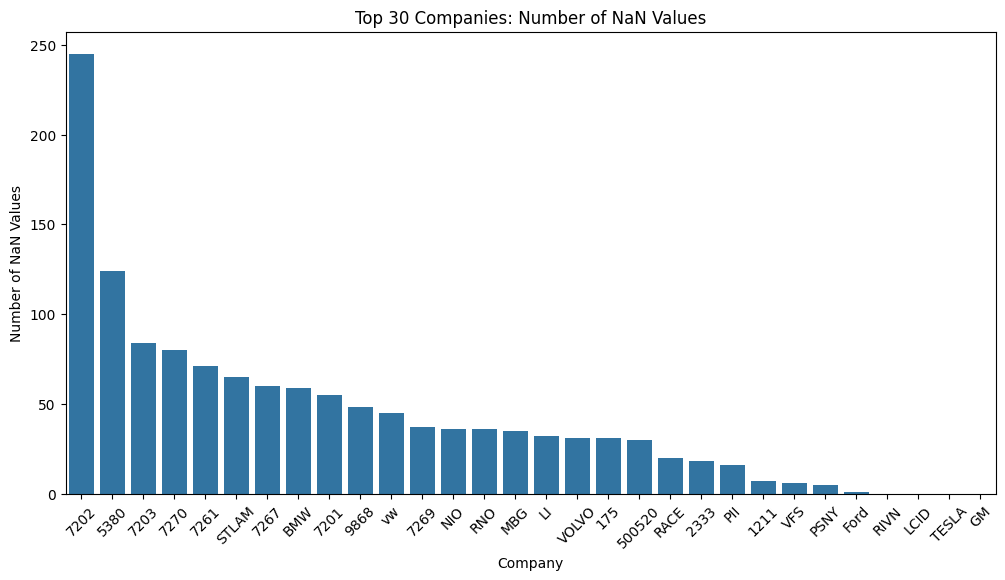

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/combined_data_cleaned.csv')

# Count NaN values for each company
nan_counts = df.groupby('Stock').apply(lambda x: x.isnull().sum())

# Sum NaN counts across columns to get total NaN count for each company
nan_counts['Total NaN'] = nan_counts.sum(axis=1)

# Specify the number of top companies to visualize
top_n = 30  # You can adjust this number based on your preference

# Select top N companies with the most NaN values
top_nan_companies = nan_counts['Total NaN'].sort_values(ascending=False).head(top_n)

# Bar chart to visualize the number of NaN values for each top company
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nan_companies.index, y=top_nan_companies.values)
plt.title(f'Top {top_n} Companies: Number of NaN Values')
plt.xlabel('Company')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.show()


Now we have decreased the huge number of NaN

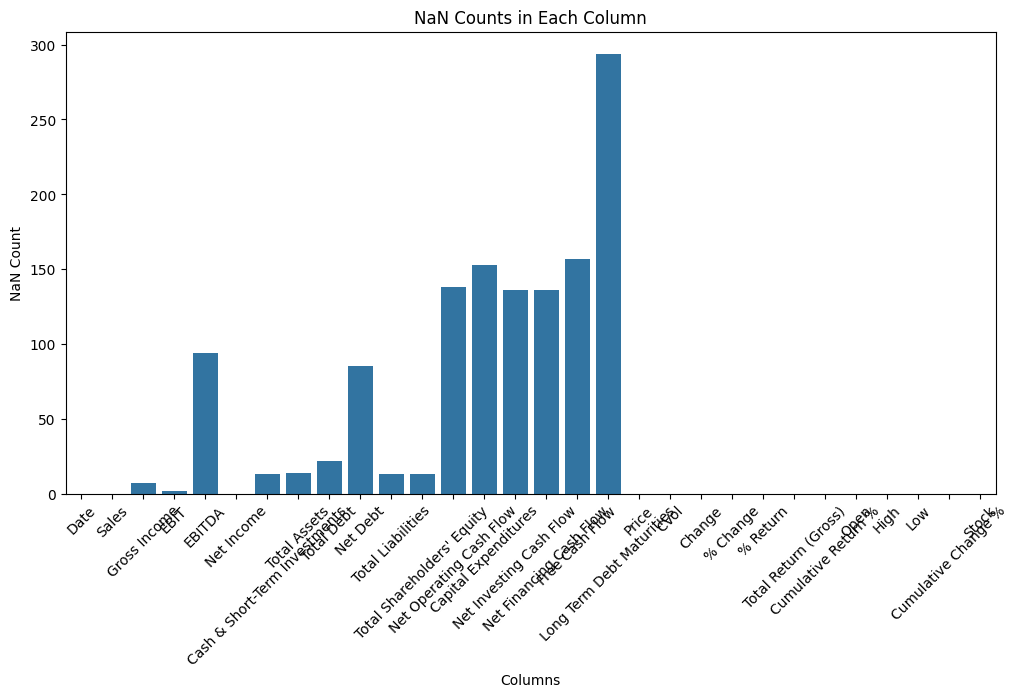

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/combined_data_cleaned.csv')

# Count NaN values in each column
nan_counts = df.isnull().sum()

# Bar chart to visualize NaN counts
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=45)
plt.title('NaN Counts in Each Column')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.show()

Filling missing values with 0 is reasonable, especially considering that most of the missing data points are from the early years of the companies. This likely indicates that these companies did not have long-term debt maturities during their initial periods, which aligns with typical business growth trajectories. Filling with 0 maintains consistency and reflects the absence of long-term debt maturities accurately during those periods.

In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/combined_data_cleaned.csv')

# Fill missing values in 'Long Term Debt Maturities' and 'Total Debt' columns with 0
df['Long Term Debt Maturities'].fillna(0, inplace=True)

# Save the updated DataFrame into a new CSV file
df.to_csv('Combined/combined_data_cleaned2.csv', index=False)


In [7]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/combined_data_cleaned2.csv')

# Count the number of NaN values for each feature
nan_counts = df.isna().sum()

# Print out the number of NaN values for each feature
print("Number of NaN values for each feature:")
print(nan_counts)


Number of NaN values for each feature:
Date                               0
Sales                              0
Gross Income                       7
EBIT                               2
EBITDA                            94
Net Income                         0
Cash & Short-Term Investments     13
Total Assets                      14
Total Debt                        22
Net Debt                          85
Total Liabilities                 13
Total Shareholders' Equity        13
Net Operating Cash Flow          138
Capital Expenditures             153
Net Investing Cash Flow          136
Net Financing Cash Flow          136
Free Cash Flow                   157
Long Term Debt Maturities          0
Price                              0
CVol                               0
Change                             0
% Change                           0
% Return                           0
Total Return (Gross)               0
Cumulative Return %                0
Open                               0

Number of remaining missing data points

As the number is small we perform linear interpolation

In [8]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/combined_data_cleaned2.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by 'Stock' and 'Date'
df = df.sort_values(by=['Stock', 'Date'])

# Group the DataFrame by 'Stock' and perform linear interpolation for each group
df = df.groupby('Stock').apply(lambda group: group.interpolate(method='linear'))

# Save the updated DataFrame into a new CSV file
df.to_csv('Combined/combined_data_linear_interpolated.csv', index=False)


C:\Users\abdul\AppData\Local\Temp\ipykernel_10612\2752181556.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby('Stock').apply(lambda group: group.interpolate(method='linear'))
C:\Users\abdul\AppData\Local\Temp\ipykernel_10612\2752181556.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby('Stock').apply(lambda group: group.interpolate(method='linear'))
C:\Users\abdul\AppData\Local\Temp\ipykernel_10612\2752181556.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby('Stock').apply(lambda group: group.interpolate(method='linear'))
C:\Users\abdul\AppData\Local\Temp\ipy

In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/combined_data_linear_interpolated.csv')

# Count the number of NaN values for each feature
nan_counts = df.isna().sum()

# Print out the number of NaN values for each feature
print("Number of NaN values for each feature:")
print(nan_counts)


Number of NaN values for each feature:
Date                              0
Sales                             0
Gross Income                      3
EBIT                              0
EBITDA                           65
Net Income                        0
Cash & Short-Term Investments     0
Total Assets                      0
Total Debt                        4
Net Debt                         11
Total Liabilities                 0
Total Shareholders' Equity        0
Net Operating Cash Flow          70
Capital Expenditures             78
Net Investing Cash Flow          72
Net Financing Cash Flow          72
Free Cash Flow                   78
Long Term Debt Maturities         0
Price                             0
CVol                              0
Change                            0
% Change                          0
% Return                          0
Total Return (Gross)              0
Cumulative Return %               0
Open                              0
High                     

In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/combined_data_linear_interpolated.csv')

# Drop rows with any NaN values
df = df.dropna()

# Save the updated DataFrame into a new CSV file
df.to_csv('Combined/FullDataset.csv', index=False)


Drop rows with NaN Since most of the remaining NaN is in the early year of the company

In [13]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined/FullDataset.csv')

# Count the number of NaN values for each feature
nan_counts = df.isna().sum()

# Print out the number of NaN values for each feature
print("Number of NaN values for each feature:")
print(nan_counts)


Number of NaN values for each feature:
Date                             0
Sales                            0
Gross Income                     0
EBIT                             0
EBITDA                           0
Net Income                       0
Cash & Short-Term Investments    0
Total Assets                     0
Total Debt                       0
Net Debt                         0
Total Liabilities                0
Total Shareholders' Equity       0
Net Operating Cash Flow          0
Capital Expenditures             0
Net Investing Cash Flow          0
Net Financing Cash Flow          0
Free Cash Flow                   0
Long Term Debt Maturities        0
Price                            0
CVol                             0
Change                           0
% Change                         0
% Return                         0
Total Return (Gross)             0
Cumulative Return %              0
Open                             0
High                             0
Low             

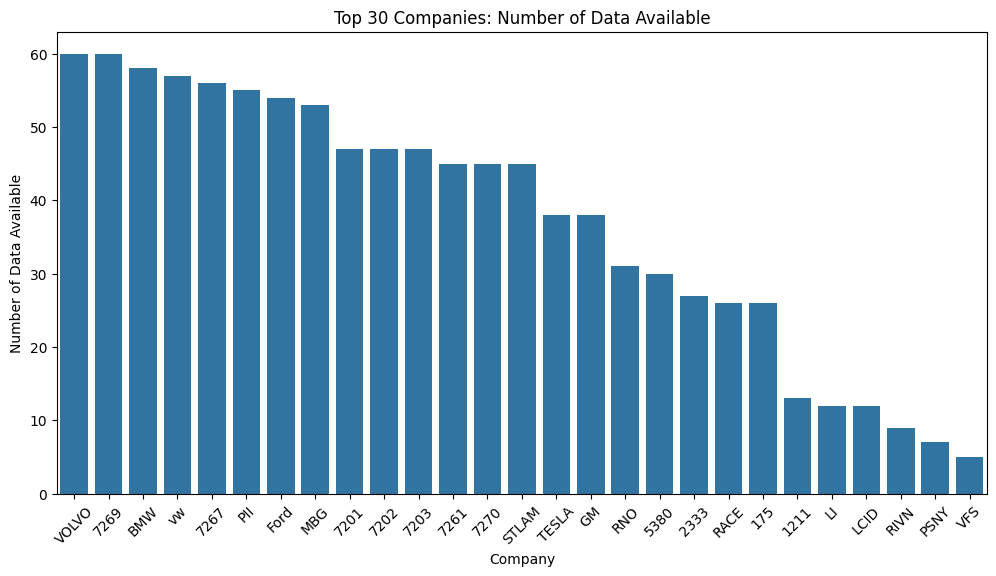

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Combined/FullDataset.csv')

# Count non-null values for each company
data_available = df.groupby('Stock').count().iloc[:, 0]

# Specify the number of top companies to visualize
top_n = 30  # You can adjust this number based on your preference

# Select top N companies with the most available data
top_companies = data_available.sort_values(ascending=False).head(top_n)

# Bar chart to visualize the number of data available for each top company
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title(f'Top {top_n} Companies: Number of Data Available')
plt.xlabel('Company')
plt.ylabel('Number of Data Available')
plt.xticks(rotation=45)
plt.show()


Number of reports for each company after cleaning

Drop the coulmns that is not used in historcal prices as we only assume the input is financial numbers and target is the stock price

drop these coulmns : "Cumulative Change %"  , "Cumulative Return %" , Change" ,"% Change" , "% Return" , "Total Return (Gross)" , "Cumulative Return %" , Cumulative Change %" , Open high,low,

In [23]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Combined/FullDataset.csv")

# Drop the specified columns
columns_to_drop = ["Open","High","Low","CVol","Cumulative Change %", "Cumulative Return %", "Change", "% Change", "% Return", "Total Return (Gross)", "Cumulative Return %", "Cumulative Change %"]
df_cleaned = df.drop(columns=columns_to_drop)

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv("Combined/FullCleaned.csv", index=False)


Lastly we apply normlazation to dataset

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('Combined/FullCleaned.csv')

# Identify the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize all numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Specify the directory to save the file
output_directory = 'Full'
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Save the standardized DataFrame to a new CSV file
output_file = os.path.join(output_directory, 'Standardized_Dataset.csv')
df.to_csv(output_file, index=False)

print("Standardization complete. The standardized data has been saved to 'Standardized_Dataset.csv' in the '{}' directory.".format(output_directory))


Standardization complete. The standardized data has been saved to 'Standardized_Dataset.csv' in the 'Full' directory.


In [2]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('Combined/FullCleaned.csv')

# Identify the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Price')

# Normalize all numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Specify the directory to save the file
output_directory = 'Full2'
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Save the normalized DataFrame to a new CSV file
output_file = os.path.join(output_directory, 'Normalized_Dataset.csv')
df.to_csv(output_file, index=False)

print("Normalization complete. The normalized data has been saved to 'Normalized_Dataset.csv' in the '{}' directory.".format(output_directory))


Normalization complete. The normalized data has been saved to 'Normalized_Dataset.csv' in the 'Full2' directory.
